# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup to perform weather analysis. 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random 
import csv
from pprint import pprint

# Import API key
# from api_keys import api_key 
api_key='262ad50bad31bcb59da6208a5a8db50e'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_key)

262ad50bad31bcb59da6208a5a8db50e


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities_data = {"name": [], "temp": [], "humidity": [], "clouds": [], "wind": [], "lat": [], "lon": [], "id": []}
# to get the API 
basic_url = "http://api.openweathermap.org/data/2.5/weather?units=metric"
city_id = 1
for city in cities:
    if len(cities_data["name"]) < 500:
        try:
            url = basic_url+"&appid="+api_key+"&q="+str(city)
            whether_request = requests.get(url)
            whether_data = whether_request.json()
            cities_data["name"].append(whether_data["name"])
            cities_data["temp"].append(whether_data["main"]["temp"])
            cities_data["humidity"].append(whether_data["main"]["humidity"])
            cities_data["clouds"].append(whether_data["clouds"]["all"])
            cities_data["wind"].append(whether_data["wind"]["speed"])
            cities_data["lat"].append(whether_data["coord"]["lat"])
            cities_data["lon"].append(whether_data["coord"]["lon"])
            cities_data["id"].append(city_id)
            city_id = city_id + 1
        except:
            pass

In [5]:
# to print each city name and its id:
sequence = 0
if len(["name"]) == len(cities_data["id"]) == 500:
    for i in range(len(cities_data["name"])):
        print("The city of " + str(cities_data["name"][sequence]) + \
              ": internal id number: " + str(cities_data["id"][sequence]))
        sequence = sequence + 1
else:
    print("Something is wrong! Check your work! Some data is missing")

Something is wrong! Check your work! Some data is missing


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# to export city data into CSV file:
import csv
from itertools import zip_longest

transposed_data = list(zip_longest(*cities_data.values()))

with open('cities_data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(cities_data.keys())
    for items in transposed_data:
          writer.writerow(items)

In [7]:
# convert cities data into DataFrame
cities_dataframe = pd.DataFrame.from_dict(cities_data,orient='index').transpose()
cities_dataframe.head()

,name,temp,humidity,clouds,wind,lat,lon,id
0,Lorengau,25.57,88,100,5.47,-2.02,147.27,1
1,Maraa,31.07,62,86,1.02,-1.83,-65.37,2
2,Saint-Joseph,22.93,73,0,1.5,43.56,6.97,3
3,Ginda,15.47,94,100,1.28,30.69,78.49,4
4,Norman Wells,9,81,90,1.5,65.28,-126.83,5


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

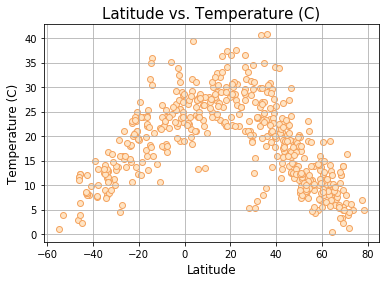

In [14]:
lat_vs_temp = plt.scatter(x = cities_dataframe["lat"],y = cities_dataframe["temp"], \
                          alpha = 1, c="bisque", edgecolors="sandybrown")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Temperature (C)', fontsize = 12)
plt.title('Latitude vs. Temperature (C)', fontsize = 15)
plt.grid()
plt.savefig("Latitude vs. Temperature.png", dpi=750)
plt.show()

#### Latitude vs. Humidity Plot

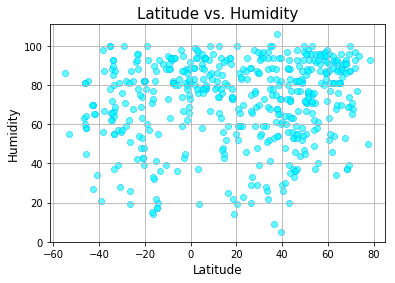

In [15]:
lat_vs_hum = plt.scatter(x = cities_dataframe["lat"],y = cities_dataframe["humidity"], \
                         alpha = .6, c="aqua", edgecolors="deepskyblue")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity', fontsize = 12)
plt.title('Latitude vs. Humidity', fontsize = 15)
plt.grid()
plt.savefig("Latitude vs. Humidity.png", dpi=750)
plt.show()

#### Latitude vs. Cloudiness Plot

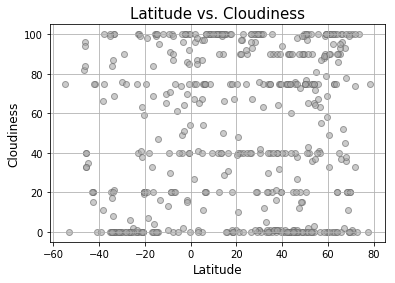

In [16]:
lat_vs_cloud = plt.scatter(x = cities_dataframe["lat"],y = cities_dataframe["clouds"], \
                         alpha = .6, c="darkgrey", edgecolors="dimgrey")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness', fontsize = 12)
plt.title('Latitude vs. Cloudiness', fontsize = 15)
plt.grid()
plt.savefig("Latitude vs. Cloudiness.png", dpi=750)
plt.show()

#### Latitude vs. Wind Speed Plot

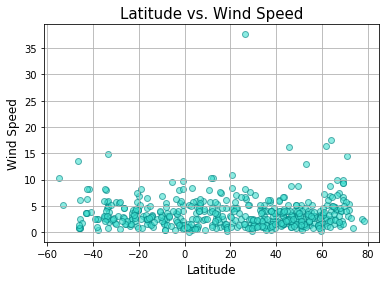

In [17]:
lat_vs_wind = plt.scatter(x = cities_dataframe["lat"],y = cities_dataframe["wind"], \
                         alpha = .6, c="turquoise", edgecolors="teal")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed', fontsize = 12)
plt.title('Latitude vs. Wind Speed', fontsize = 15)
plt.grid()
plt.savefig("Latitude vs. Wind Speed.png", dpi=750)
plt.show()

In [19]:
cities_dataframe.to_html("data.html")